In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.fft import fft, fftfreq
from pytest import approx

In [2]:
def plot_my_array(freqs, complex_array, half=False):
    N = len(freqs)
    if half:
        last = N//2
    else:
        last = N
    plt.plot(freqs[0:last], 2.0/N * np.real(complex_array)[0:last], label='real')
    plt.plot(freqs[0:last], 2.0/N * np.imag(complex_array)[0:last], label='imag')
    plt.plot(freqs[0:last], 2.0/N * np.abs(complex_array)[0:last], label='abs')
    plt.legend()
    plt.grid()
    plt.show()

In [3]:
ref = np.loadtxt(fname='ref.csv', delimiter=' ')

ref

array([[-2.,  2.,  1.],
       [-1.,  3.,  2.],
       [ 0.,  4.,  2.],
       [ 1.,  5.,  2.],
       [ 2.,  6.,  3.],
       [ 3.,  7.,  3.],
       [ 4.,  8.,  3.],
       [ 5.,  9.,  4.],
       [ 6., 10.,  4.],
       [ 7., 11.,  4.],
       [ 8., 12.,  4.],
       [ 9., 13.,  4.],
       [10., 14.,  5.]])

In [4]:
sample = np.loadtxt(fname='sample.csv', delimiter=' ')
sample

array([[ -2.,  21.,   1.],
       [ -1.,  32.,   2.],
       [  0.,  43.,   2.],
       [  1.,  52.,   2.],
       [  2.,  61.,   3.],
       [  3.,  71.,   3.],
       [  4.,  84.,   3.],
       [  5.,  93.,   4.],
       [  6., 102.,   4.],
       [  7., 113.,   4.],
       [  8., 123.,   4.],
       [  9., 132.,   4.],
       [ 10., 141.,   5.]])

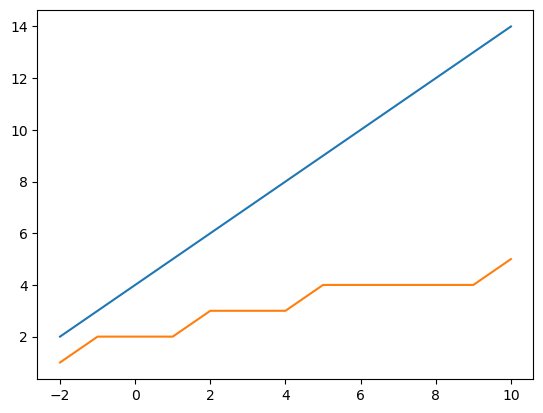

In [5]:
image = plt.plot(ref[:,0], ref[:,1])
image = plt.plot(ref[:,0], ref[:,2])
plt.show()

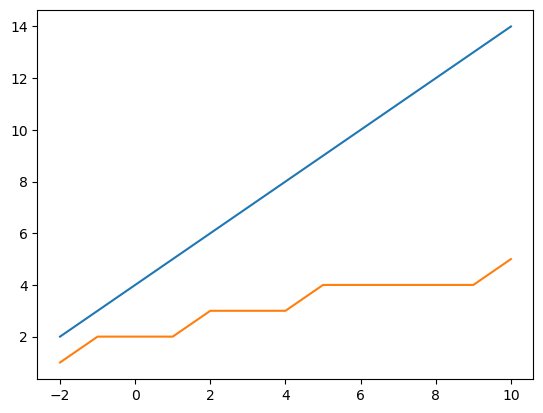

In [6]:
for col in range(1, ref.shape[1]):
    plt.plot(ref[:, 0], ref[:, col])

In [7]:
diff = ref[:, 2] - ref[:, 1]
diff

array([-1., -1., -2., -3., -3., -4., -5., -5., -6., -7., -8., -9., -9.])

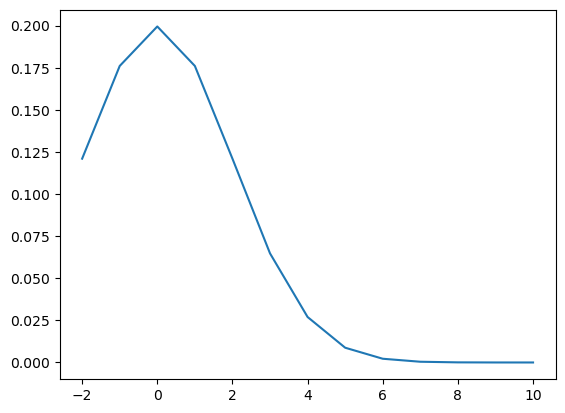

In [8]:
# Gaussian
x = []
y = []
mean = 0.
std_dev = 2.
T = 1.  # sample spacing

for row in np.arange(-2., 10.0 + T/2., T):
    x.append(row)
    y.append(scipy.stats.norm.pdf(row, mean, std_dev))

gauss_image = plt.plot(x, y)
plt.show()

In [9]:
gauss_values = np.stack((x, y), axis=1)
np.savetxt("gauss.txt", gauss_values)
gauss_values

array([[-2.00000000e+00,  1.20985362e-01],
       [-1.00000000e+00,  1.76032663e-01],
       [ 0.00000000e+00,  1.99471140e-01],
       [ 1.00000000e+00,  1.76032663e-01],
       [ 2.00000000e+00,  1.20985362e-01],
       [ 3.00000000e+00,  6.47587978e-02],
       [ 4.00000000e+00,  2.69954833e-02],
       [ 5.00000000e+00,  8.76415025e-03],
       [ 6.00000000e+00,  2.21592421e-03],
       [ 7.00000000e+00,  4.36341348e-04],
       [ 8.00000000e+00,  6.69151129e-05],
       [ 9.00000000e+00,  7.99187055e-06],
       [ 1.00000000e+01,  7.43359757e-07]])

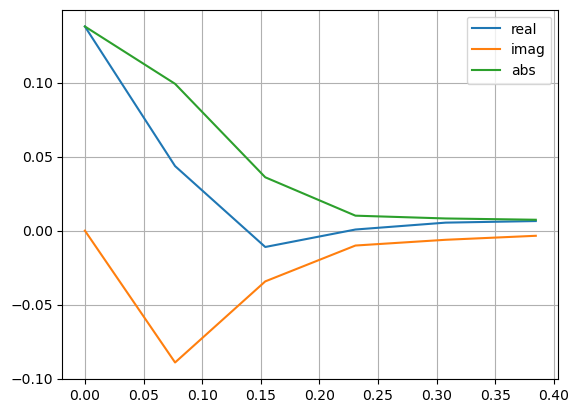

In [10]:
N = len(x)

yf = fft(y)
xf = fftfreq(N, T)
plot_my_array(xf, yf, half=True)

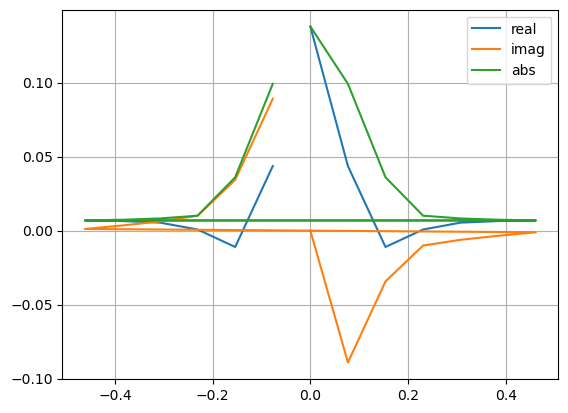

In [11]:
plot_my_array(xf, yf, half=False)

In [12]:
ref

array([[-2.,  2.,  1.],
       [-1.,  3.,  2.],
       [ 0.,  4.,  2.],
       [ 1.,  5.,  2.],
       [ 2.,  6.,  3.],
       [ 3.,  7.,  3.],
       [ 4.,  8.,  3.],
       [ 5.,  9.,  4.],
       [ 6., 10.,  4.],
       [ 7., 11.,  4.],
       [ 8., 12.,  4.],
       [ 9., 13.,  4.],
       [10., 14.,  5.]])

In [13]:
s2ms1_ref = ref[:, 2] - ref[:, 1]
s2ms1_ref

array([-1., -1., -2., -3., -3., -4., -5., -5., -6., -7., -8., -9., -9.])

In [14]:
sample

array([[ -2.,  21.,   1.],
       [ -1.,  32.,   2.],
       [  0.,  43.,   2.],
       [  1.,  52.,   2.],
       [  2.,  61.,   3.],
       [  3.,  71.,   3.],
       [  4.,  84.,   3.],
       [  5.,  93.,   4.],
       [  6., 102.,   4.],
       [  7., 113.,   4.],
       [  8., 123.,   4.],
       [  9., 132.,   4.],
       [ 10., 141.,   5.]])

In [15]:
s2ms1_sample = sample[:, 2] - sample[:, 1]
s2ms1_sample

array([ -20.,  -30.,  -41.,  -50.,  -58.,  -68.,  -81.,  -89.,  -98.,
       -109., -119., -128., -136.])

In [16]:
# Do some tests to make sure what we are dealing with

# Sample and reference should have the same time steps
assert sample[:, 0].all() == approx(ref[:, 0].all())  # we're dealing with reals

# The time steps must be evenly distributed
T = sample[1, 0] - sample[0, 0]
for i in range(1, len(sample)):
    assert T == approx(sample[i, 0] - sample[i-1, 0])

In [17]:
# Find the frequencies
T = ref[1, 0] - ref[0, 0]
N = len(ref[:, 0])

xf = fftfreq(N, T)
xf

array([ 0.        ,  0.07692308,  0.15384615,  0.23076923,  0.30769231,
        0.38461538,  0.46153846, -0.46153846, -0.38461538, -0.30769231,
       -0.23076923, -0.15384615, -0.07692308])

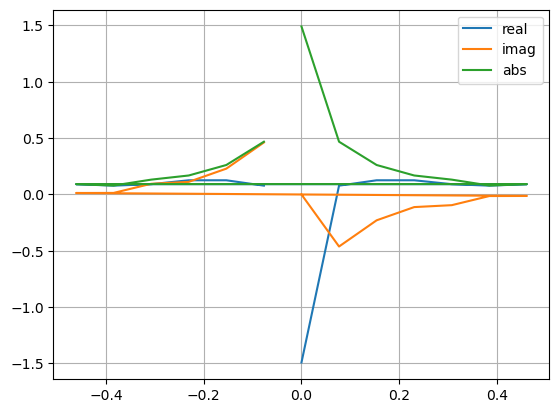

In [18]:
# Find the FT for ref
E_ref = (2.0/N) * fft(s2ms1_ref)
plot_my_array(xf, E_ref, half=False)

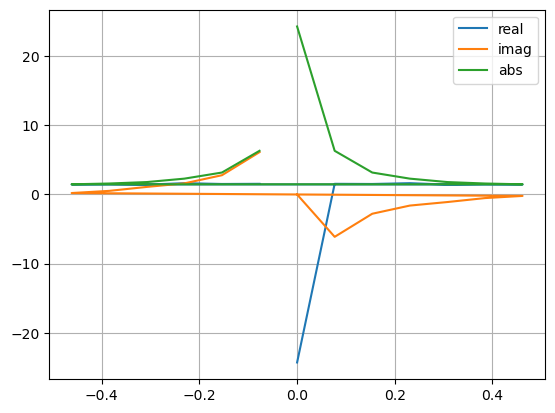

In [19]:
# Find the FT for sample
E_sample = (2.0/N) * fft(s2ms1_sample)
plot_my_array(xf, E_sample, half=False)

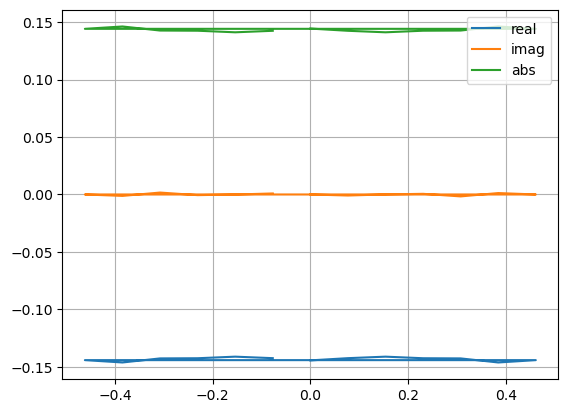

In [20]:
im_array = (E_ref - E_sample)/E_sample

plot_my_array(xf, im_array, half=False)

[-0.93865628-0.00000000e+00j -0.92609805-5.81407916e-03j
 -0.91758107+3.02482754e-04j -0.92652811+3.68188574e-03j
 -0.92747403-1.08774724e-02j -0.95049449+8.00803619e-03j
 -0.93722366-1.53285248e-05j -0.93722366+1.53285248e-05j
 -0.95049449-8.00803619e-03j -0.92747403+1.08774724e-02j
 -0.92652811-3.68188574e-03j -0.91758107-3.02482754e-04j
 -0.92609805+5.81407916e-03j]


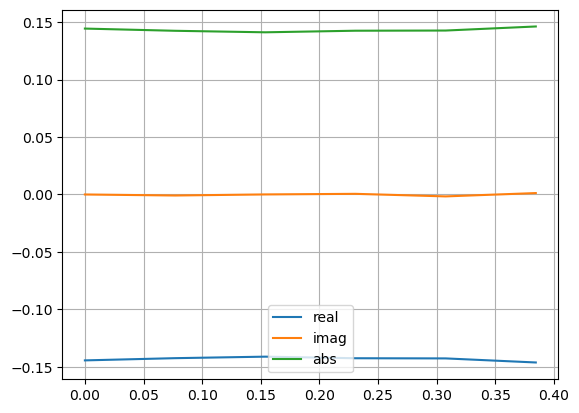

In [21]:
print(im_array)
plot_my_array(xf, im_array, half=True)